### Iris Dataset 

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import pandas_profiling

In [2]:
df = pd.read_csv('iris_data.csv', index_col=False, header=0)

In [3]:
profile = pandas_profiling.ProfileReport(df)
profile.to_file(outputfile="./iris_report.html")

In [4]:
df.head()

,sep-len,sep-wid,pet-len,pet-wid,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.utils import np_utils

/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
df = df.sample(frac=1).reset_index(drop=True)

In [7]:
X = df.iloc[:,0:4].values
y_labels = df.iloc[:, 4:5].values

In [9]:
labelencoder_y_1 = LabelEncoder()
y_label_encoded = labelencoder_y_1.fit_transform(y_labels)

/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
#onehotencoder = OneHotEncoder(categorical_features = [0])
#y = onehotencoder.fit_transform(y_label_encoded).toarray()
y_label_encoded

array([2, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 1, 2, 0, 1, 1, 2, 2, 2, 1, 0,
       1, 1, 2, 2, 1, 2, 1, 1, 0, 1, 1, 0, 2, 2, 0, 1, 0, 2, 1, 0, 2, 1,
       2, 1, 2, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 2, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 2, 0, 1, 0, 2, 0, 0, 1, 0, 2, 2, 2, 0, 1, 2, 0, 2, 1, 2, 2, 0,
       1, 2, 2, 0, 2, 1, 2, 1, 1, 2, 1, 2, 0, 0, 2, 1, 0, 0, 2, 1, 0, 2,
       2, 2, 0, 0, 0, 1, 0, 2, 1, 2, 1, 2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 0,
       2, 0, 0, 2, 2, 1, 0, 2, 1, 0, 0, 2, 1, 0, 2, 0, 1, 0])

In [11]:
y = np_utils.to_categorical(y_label_encoded)

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split

/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [14]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [15]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Making the Neural Network

In [16]:

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [17]:
# Initialising the ANN
classifier = Sequential()

The architecture for the neural network is: 
Input Layer: 4 neurons
Hidden Layer: 10 neurons Activation: ReLU
Output Layer: 3 neurons Activation: Softmax


In [18]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 10, init = 'uniform', activation = 'relu', input_dim = 4))

/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=10, activation="relu", input_dim=4)`
  from ipykernel import kernelapp as app


In [19]:
# Adding the second hidden layer
#classifier.add(Dense(output_dim = 4, init = 'uniform', activation = 'relu'))

In [20]:
# Adding the output layer
classifier.add(Dense(output_dim = 3, init = 'uniform', activation = 'softmax'))

/home/imcoolswap/anaconda2/envs/pyDL/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", units=3, activation="softmax")`
  from ipykernel import kernelapp as app


In [21]:
# Compiling the ANN [using binary since we have two possible prediction values]
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [22]:
# Fitting the ANN to the Training set
training = classifier.fit(X_train, y_train, batch_size = 5, epochs = 150)

Epoch 1/150
120/120 [==============================] - 0s 2ms/step - loss: 1.0934 - acc: 0.7000
Epoch 2/150
120/120 [==============================] - 0s 372us/step - loss: 1.0789 - acc: 0.7083
Epoch 3/150
120/120 [==============================] - 0s 403us/step - loss: 1.0463 - acc: 0.7083
Epoch 4/150
120/120 [==============================] - 0s 370us/step - loss: 0.9872 - acc: 0.7083
Epoch 5/150
120/120 [==============================] - 0s 389us/step - loss: 0.9065 - acc: 0.7083
Epoch 6/150
120/120 [==============================] - 0s 371us/step - loss: 0.8138 - acc: 0.7083
Epoch 7/150
120/120 [==============================] - 0s 398us/step - loss: 0.7264 - acc: 0.7083
Epoch 8/150
120/120 [==============================] - 0s 398us/step - loss: 0.6492 - acc: 0.7083
Epoch 9/150
120/120 [==============================] - 0s 364us/step - loss: 0.5931 - acc: 0.7083
Epoch 10/150
120/120 [==============================] - 0s 384us/step - loss: 0.5459 - acc: 0.7083
Epoch 11/150
120/120 

120/120 [==============================] - 0s 330us/step - loss: 0.1053 - acc: 0.9667
Epoch 84/150
120/120 [==============================] - 0s 359us/step - loss: 0.1035 - acc: 0.9667
Epoch 85/150
120/120 [==============================] - 0s 357us/step - loss: 0.1020 - acc: 0.9667
Epoch 86/150
120/120 [==============================] - 0s 397us/step - loss: 0.1008 - acc: 0.9667
Epoch 87/150
120/120 [==============================] - 0s 355us/step - loss: 0.0991 - acc: 0.9667
Epoch 88/150
120/120 [==============================] - 0s 371us/step - loss: 0.0976 - acc: 0.9667
Epoch 89/150
120/120 [==============================] - 0s 382us/step - loss: 0.0961 - acc: 0.9667
Epoch 90/150
120/120 [==============================] - 0s 369us/step - loss: 0.0955 - acc: 0.9667
Epoch 91/150
120/120 [==============================] - 0s 345us/step - loss: 0.0942 - acc: 0.9750
Epoch 92/150
120/120 [==============================] - 0s 361us/step - loss: 0.0928 - acc: 0.9667
Epoch 93/150
120/120 [=

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

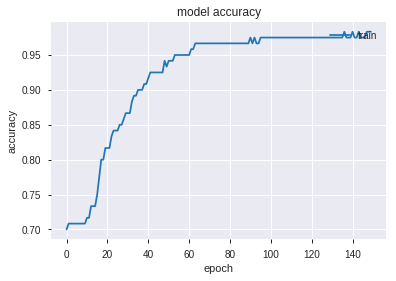

In [24]:
# summarize history for accuracy
plt.plot(training.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')
plt.show()

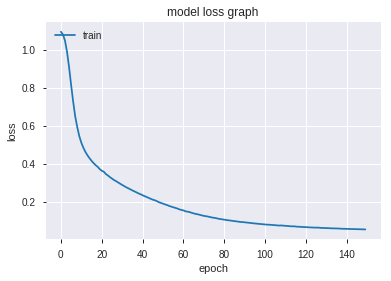

In [25]:
# summarize history for accuracy
plt.plot(training.history['loss'])
plt.title('model loss graph')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

### Predicting the class for test set

In [26]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [27]:
y_pred_binary = []

In [28]:
for i in range(y_pred.shape[0]):
    if y_pred[i][0] > y_pred[i][1] and y_pred[i][0] > y_pred[i][2]:
        y_pred_binary.append([1.0,0.0,0.0])
    elif y_pred[i][1] > y_pred[i][0] and y_pred[i][1] > y_pred[i][2]:
        y_pred_binary.append([0.0,1.0,0.0])
    else:
        y_pred_binary.append([0.0,0.0,1.0])

In [29]:
y_pred_binary = np.array(y_pred_binary)

In [30]:
#y_pred_binary
y_test == y_pred_binary

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True, False, False],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])